In [27]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [29]:
X = X - np.mean(X, axis=0)

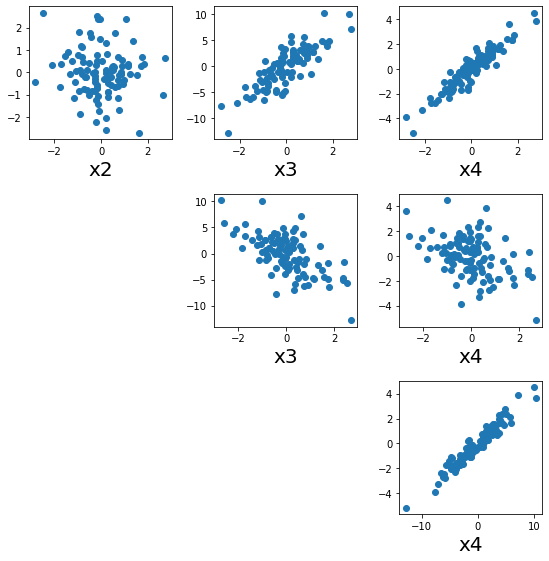

In [30]:
plt.figure(figsize=(10,10))
for i in range(4):
  for j in range(4):
    if j > i:
      plt.subplot(4,4,i*4+j+1)
      plt.scatter(X[:,i], X[:,j])
      plt.xlabel(f'x{i+1}', fontsize=20)
      plt.xlabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

Observations:

- x1 and x2 do not seem correlated
- x1 seems very correlated with both x3 and x4
- x2 seems somewhat correlated with both x3 and x4
- x3 and x4 seem very correlated

In [31]:
#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

PCA(n_components=4)

In [32]:
principal_comps_builtin = pca.components_.T

In [33]:
#print each principal component
for i,component in enumerate(pca.components_):
  print(f'principal component {i}')
  print(component)
  print()

principal component 0
[-0.19728449  0.15120453 -0.89414626 -0.3724493 ]

principal component 1
[ 0.49154383  0.79461606 -0.11461821  0.33739093]

principal component 2
[ 0.17946279  0.30681226  0.3698509  -0.85841112]

principal component 3
[ 0.82900941 -0.50158622 -0.22488983 -0.10285534]



In [34]:
#compute covariance matrix
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100

In [35]:
#eigenvalues snd eigenvectors of the covariance matrix
eigvecs = np.linalg.eig(cov_matrix)

In [36]:
#sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]

In [37]:
#get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [38]:
principal_comps_byhand

array([[ 0.19728449, -0.49154383, -0.17946279, -0.82900941],
       [-0.15120453, -0.79461606, -0.30681226,  0.50158622],
       [ 0.89414626,  0.11461821, -0.3698509 ,  0.22488983],
       [ 0.3724493 , -0.33739093,  0.85841112,  0.10285534]])

In [42]:
#results from built-in call

A = principal_comps_byhand
B = principal_comps_builtin

if A.all() == B.all():
  print("These matrices are the same")


These matrices are the same
